In [ ]:
### Analiza de text - Baza de date formata din 20 de documente PDF

In [ ]:
pip install pandas pyPDF2

In [1]:
# Importarea bibliotecilor necesare
import os
from PyPDF2 import PdfReader
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import PyPDF2

In [2]:
# Extragerea textului din pdf-uri
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text


In [3]:
# Crearea corpusului
import os
import pandas as pd
import PyPDF2
def build_corpus(pdf_folder):
    corpus = []
    for filename in os.listdir(pdf_folder):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(pdf_folder, filename)
            text = extract_text_from_pdf(pdf_path)
            corpus.append(text)
    corpus=pd.DataFrame(corpus, columns =['PDF'])
    return corpus

pdf_folder = r'C:\Materiale facultate\MASTER CEC\Data Mining\bd - 20 pdf'
corpus = build_corpus(pdf_folder)


In [4]:
corpus

,PDF
0,Review of Economic Dynamics xxx (xxxx) xxx\nPl...
1,Physica A 630 (2023) 129165\nAvailable online ...
2,EconomicAnalysisandPolicy80(2023)109–120\nCont...
3,Finance Research Letters 58 (2023) 104347\nAva...
4,EconomicAnalysisandPolicy80(2023)1080–1095\nCo...
5,Finance Research Letters 58 (2023) 104507\nAva...
6,Finance Research Letters 55 (2023) 103993\nAva...
7,Finance Research Letters 58 (2023) 104584\nAva...
8,EconomicAnalysisandPolicy80(2023)222–246\nCont...
9,Finance Research Letters 56 (2023) 104177\nAva...


In [5]:
# Preprocesarea textului

# Definim o functie pentru preprocesarea textului 
# Convertirea in litere mici, eliminarea textului in paranteze patrate, eliminarea link-urilor, a semnelor de punctuatie, 
# a adreselor de mail, etc.
import string
import re
def pdf_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\([^)]*\)', '', text)
    return text

In [40]:
corpus['PDF'] = corpus['PDF'].apply(pdf_cleaning)
corpus

,PDF
0,review economic dynamic xxx xxxx xxxplease cit...
1,physica online september elsevier bv right res...
2,list available sciencedirecteconomicanalysisan...
3,finance research letter online august elsevier...
4,list available sciencedirecteconomicanalysisan...
5,finance research letter online september autho...
6,finance research letter online elsevier inc ri...
7,finance research letter online october elsevie...
8,list available sciencedirecteconomicanalysisan...
9,finance research letter online july elsevier i...


In [7]:
# Preprocesarea textului
def preprocess_text(text):
    #Tokenizare
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    #Eliminare Punctuatie si numere
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    #Eliminare Stopwords
    words = [word for word in words if word not in stop_words]
   
    return " ".join(words)

In [8]:
corpus['PDF'] = corpus['PDF'].apply(preprocess_text)
corpus

,PDF
0,review economic dynamic xxx xxxx xxxplease cit...
1,physica online september elsevier bv right res...
2,list available sciencedirecteconomicanalysisan...
3,finance research letter online august elsevier...
4,list available sciencedirecteconomicanalysisan...
5,finance research letter online september autho...
6,finance research letter online may elsevier in...
7,finance research letter online october elsevie...
8,list available sciencedirecteconomicanalysisan...
9,finance research letter online july elsevier i...


In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Oana\AppData\Roaming\nltk_data...


True

In [38]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Oana\AppData\Roaming\nltk_data...


True

In [10]:
words_to_remove = ['yes', 'et', 'al', 'two', 'based', 'new', 'eg', 'using', 'used', 'one', 'case', 'use', 'table', 'method', 'due', 'first', 'term', 'given', 'provide', 'may', 'section', 'approach', 'following', 'fig', 'u', 'suggest', 'show', 'see', 'various', 'journal', 'study', 'model','finding']
corpus['PDF'] = corpus['PDF'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words_to_remove)]))

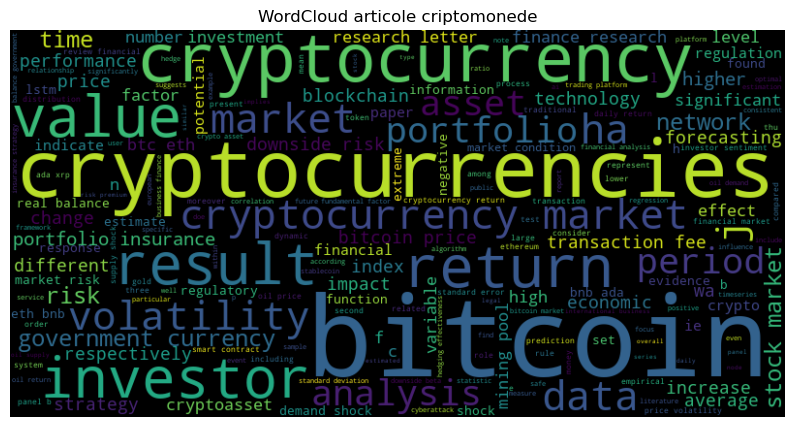

In [11]:
#WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(corpus['PDF'])
# Word Cloud pentru cuvintele cele mai frecvente
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
# Afișare Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud articole criptomonede')
plt.show()

[('market', 1252), ('cryptocurrency', 1011), ('bitcoin', 1005), ('return', 651), ('risk', 585), ('cryptocurrencies', 577), ('price', 567), ('volatility', 517), ('portfolio', 446), ('financial', 440), ('shock', 408), ('investor', 386), ('data', 345), ('asset', 344), ('oil', 341), ('value', 331), ('result', 331), ('finance', 326), ('currency', 300), ('j', 299)]


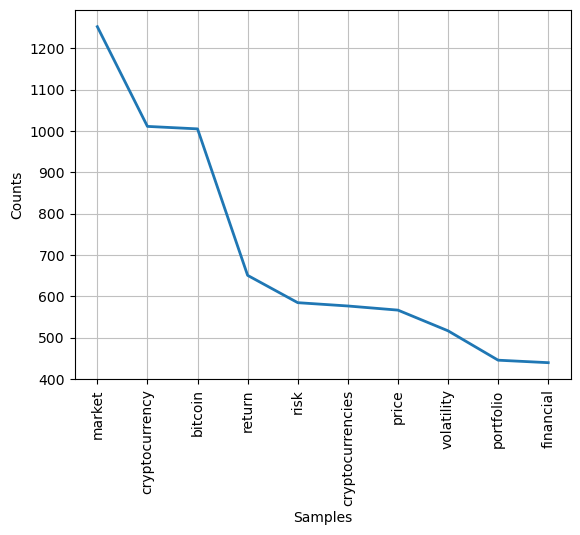

In [39]:
# Grafic pt reprezentarea frecventei de aparitie a cuvintelor
from nltk.probability import FreqDist 
from nltk.tokenize import word_tokenize

text = ' '.join(corpus['PDF'].tolist())

tokens = word_tokenize(text.lower())

tokens = [token for token in tokens if token.isalpha()]
freqdist = FreqDist(tokens)
print(freqdist.most_common(20))
freqdist.plot(10)
plt.show() 

[(('cryptocurrency', 'market'), 223), (('government', 'currency'), 153), (('stock', 'market'), 142), (('portfolio', 'insurance'), 136), (('transaction', 'fee'), 125), (('bitcoin', 'price'), 122), (('downside', 'risk'), 122), (('btc', 'eth'), 92), (('finance', 'research'), 90), (('mining', 'pool'), 90)]


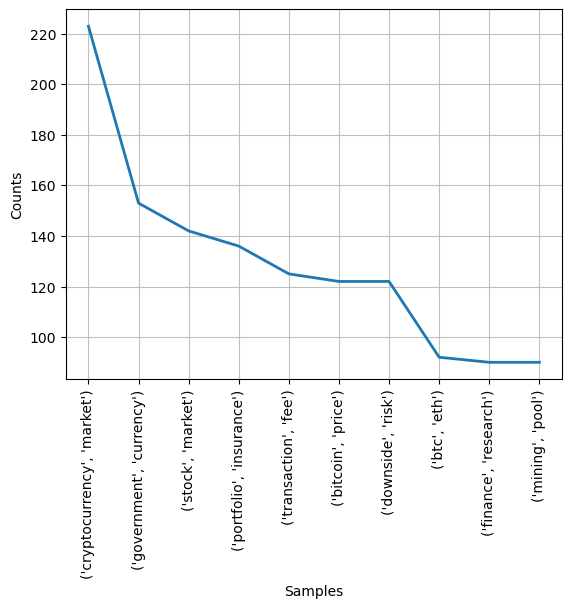

In [13]:
# Analiza N-gramelor
# BIGRAME
from nltk.util import ngrams
text = ' '.join(corpus['PDF'].tolist())
tokens = word_tokenize(text.lower())
tokens = [token for token in tokens if token.isalpha()]
bigrams = ngrams(tokens, 2)
freqdist1 = FreqDist(bigrams)
print(freqdist1.most_common(10))
 
freqdist1.plot(10)
plt.show()

[(('finance', 'research', 'letter'), 89), (('btc', 'eth', 'bnb'), 78), (('eth', 'bnb', 'ada'), 76), (('bnb', 'ada', 'xrp'), 69), (('portfolio', 'insurance', 'strategy'), 58), (('review', 'financial', 'analysis'), 57), (('real', 'balance', 'government'), 47), (('international', 'business', 'finance'), 47), (('oil', 'demand', 'shock'), 47), (('balance', 'government', 'currency'), 44)]


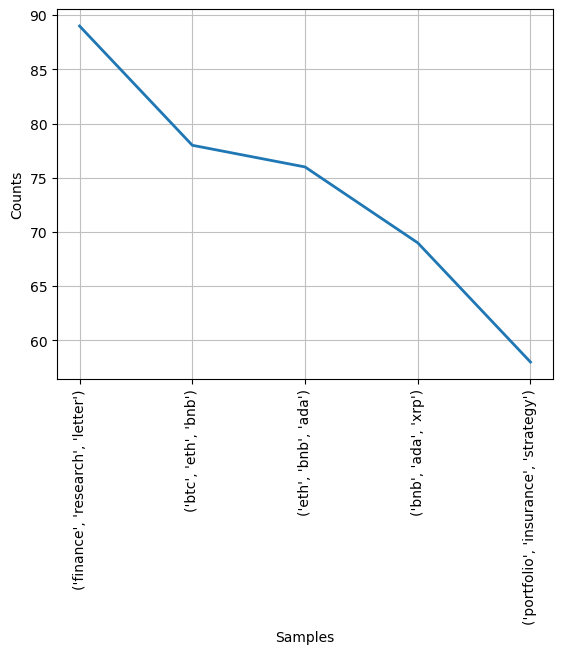

In [14]:
# TRIGRAME
text = ' '.join(corpus['PDF'].tolist())
tokens = word_tokenize(text.lower())
tokens = [token for token in tokens if token.isalpha()]

trigrams = ngrams(tokens, 3)
freqdist2 = FreqDist(trigrams)
print(freqdist2.most_common(10)) 

freqdist2.plot(5)
plt.show() 

In [18]:
# Etapa de procesare
from sklearn.model_selection import train_test_split

# Impartim datele in set de antrenare si set de testare
X_train, X_test = train_test_split(corpus['PDF'], test_size = 0.3, random_state = 42)
print(X_train)
print(X_test)

11    preproofthe impact fundamental factor sentimen...
3     finance research letter online august elsevier...
18    international review financial analysis online...
16    research international business finance online...
13    expert system application online september els...
2     list available sciencedirecteconomicanalysisan...
9     finance research letter online july elsevier i...
19    research international business finance online...
4     list available sciencedirecteconomicanalysisan...
12    resource policy online elsevier ltd right rese...
7     finance research letter online october elsevie...
10    computer law security review available online ...
14    international review financial analysis online...
6     finance research letter online elsevier inc ri...
Name: PDF, dtype: object
0     review economic dynamic xxx xxxx xxxplease cit...
17    finance research letter online september elsev...
15    international review financial analysis online...
1     physica online se

In [19]:
import pandas as pd
X_train=pd.DataFrame(X_train, index=range(0,20))
X_train=X_train.dropna()
print(X_train)

X_test=pd.DataFrame(X_test, index=range(0,20))
X_test=X_test.dropna()
print(X_test)

                                                  PDF
2   list available sciencedirecteconomicanalysisan...
3   finance research letter online august elsevier...
4   list available sciencedirecteconomicanalysisan...
6   finance research letter online elsevier inc ri...
7   finance research letter online october elsevie...
9   finance research letter online july elsevier i...
10  computer law security review available online ...
11  preproofthe impact fundamental factor sentimen...
12  resource policy online elsevier ltd right rese...
13  expert system application online september els...
14  international review financial analysis online...
16  research international business finance online...
18  international review financial analysis online...
19  research international business finance online...
                                                  PDF
0   review economic dynamic xxx xxxx xxxplease cit...
1   physica online september elsevier bv right res...
5   finance research letter 

In [20]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X_train["PDF"])

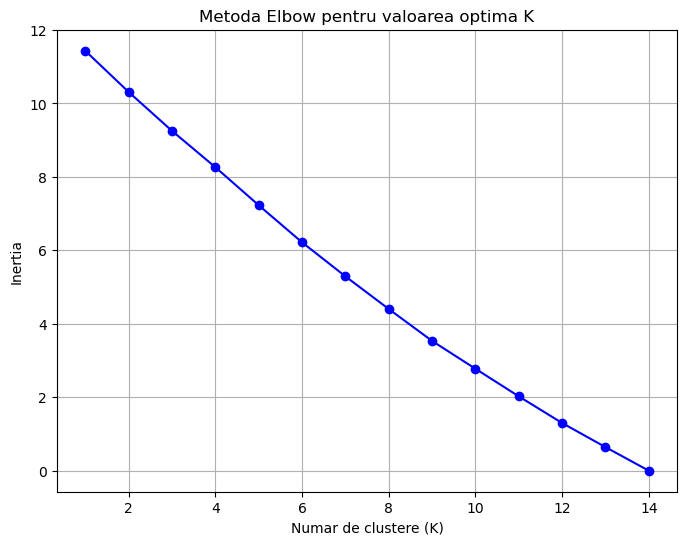

In [23]:
# Lista pt inertii - suma distantelor la patrat pana la cel mai apropiat centroid
# Metoda Elbow - pt selectarea numarului optim de clustere
inertias = []

K_range = range(1, X_train.shape[0] + 1)  

# Calculam inertia pentru fiecare valoare K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficul pt metoda Elbow
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Numar de clustere (K)')
plt.ylabel('Inertia')
plt.title('Metoda Elbow pentru valoarea optima K')
plt.grid(True)
plt.show()

# Putem alege un numar de 8 sau 9 clustere

In [26]:
# Metoda Silhouette
from sklearn.metrics import silhouette_score
import numpy as np

best_K = 2
best_silhouette_score = -1

K_values = range(2, min(X_train.shape[0], 11))  

for K in K_values:
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
    kmeans.fit(X)
    
   
    cluster_assignments = kmeans.labels_
    
    # Calculam scorul silhouette
    silhouette_avg = silhouette_score(X, cluster_assignments)
    
    
    if silhouette_avg > best_silhouette_score:
        best_K = K
        best_silhouette_score = silhouette_avg
        
print(f"Cel mai bun numar de clustere (K) este {best_K} cu un scor silhouette de {best_silhouette_score:.2f}")

Cel mai bun numar de clustere (K) este 8 cu un scor silhouette de 0.05


In [28]:
# K-Means cu 8 clustere
optimal_k = best_K  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)
kmeans.fit(X)


cluster_assignments = kmeans.labels_
cluster_assignments
for i, cluster in enumerate(cluster_assignments):
    print(f"Documentul {i}  face parte din clusterul {cluster}")

Documentul 0  face parte din clusterul 3
Documentul 1  face parte din clusterul 4
Documentul 2  face parte din clusterul 5
Documentul 3  face parte din clusterul 1
Documentul 4  face parte din clusterul 3
Documentul 5  face parte din clusterul 1
Documentul 6  face parte din clusterul 7
Documentul 7  face parte din clusterul 1
Documentul 8  face parte din clusterul 0
Documentul 9  face parte din clusterul 2
Documentul 10  face parte din clusterul 2
Documentul 11  face parte din clusterul 6
Documentul 12  face parte din clusterul 6
Documentul 13  face parte din clusterul 0


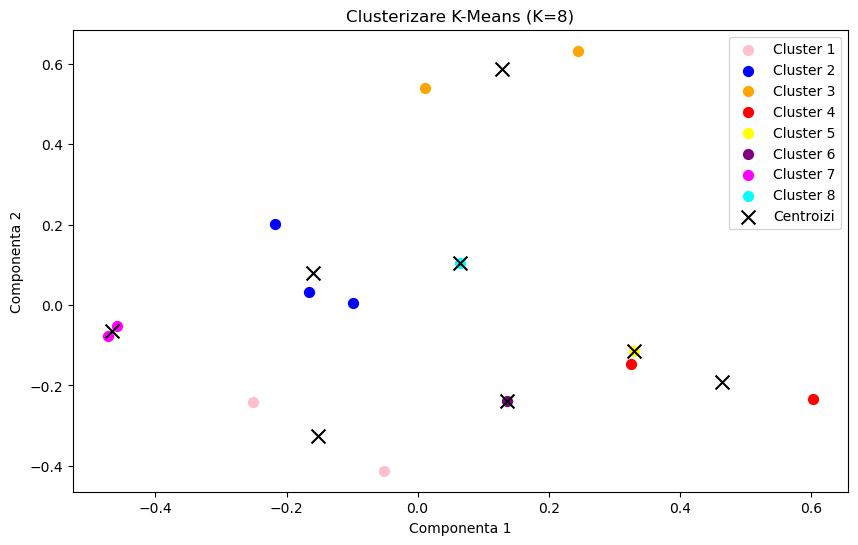

In [30]:
# Vizualizarea clusterelor
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt



K = best_K


kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
kmeans.fit(X)

# Reducem dimensionalitatea cu PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


cluster_assignments = kmeans.labels_

# Scatter plot
plt.figure(figsize=(10, 6))
colors = ['pink', 'blue', 'orange', 'red', 'yellow', 'purple', 'magenta','aqua']
for a in range(K):
    plt.scatter(X_pca[cluster_assignments == a, 0], X_pca[cluster_assignments == a, 1], s=50, c=colors[a], label=f'Cluster {a + 1}')

# Mark the cluster centers with black 'x' markers
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='k', marker='x', label='Centroizi')

plt.title(f'Clusterizare K-Means (K={K})')
plt.xlabel('Componenta 1')
plt.ylabel('Componenta 2')
plt.legend()
plt.show()

In [32]:
# Cosine Similarity - analizeaza similaritatea dintre doua documente
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


tfidf_matrix = tfidf_vectorizer.fit_transform(corpus["PDF"])


# Calculam similaritatea cosine intre toate perechile de documente
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convertim matricea intr-un Data Frame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, columns=range(corpus["PDF"].shape[0]), index=range(corpus["PDF"].shape[0]))
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.163158,0.070734,0.065164,0.064334,0.083166,0.065617,0.174309,0.054663,0.090257,0.095272,0.250622,0.079363,0.101609,0.156942,0.217334,0.150220,0.138156,0.116641,0.101123
1,0.163158,1.000000,0.110232,0.105930,0.176478,0.107032,0.092541,0.188963,0.080295,0.307555,0.121795,0.222004,0.158296,0.139638,0.228838,0.173453,0.155467,0.174389,0.134394,0.203633
2,0.070734,0.110232,1.000000,0.062852,0.068417,0.048270,0.020595,0.224920,0.040367,0.051108,0.039946,0.067387,0.063322,0.069689,0.067125,0.047982,0.036075,0.050412,0.031705,0.055136
3,0.065164,0.105930,0.062852,1.000000,0.059439,0.336340,0.037492,0.081715,0.148299,0.050402,0.038972,0.096913,0.063588,0.056926,0.078999,0.040833,0.057289,0.050469,0.045520,0.074311
4,0.064334,0.176478,0.068417,0.059439,1.000000,0.053985,0.043517,0.121402,0.058369,0.101572,0.056103,0.095981,0.119956,0.057022,0.129184,0.097048,0.096830,0.104122,0.085366,0.151236
5,0.083166,0.107032,0.048270,0.336340,0.053985,1.000000,0.041524,0.084439,0.030607,0.053241,0.050682,0.134164,0.067562,0.056756,0.093126,0.062166,0.051049,0.060197,0.056258,0.070254
6,0.065617,0.092541,0.020595,0.037492,0.043517,0.041524,1.000000,0.085887,0.032580,0.137589,0.070514,0.153651,0.067629,0.055055,0.095554,0.082555,0.108026,0.081627,0.087815,0.119550
7,0.174309,0.188963,0.224920,0.081715,0.121402,0.084439,0.085887,1.000000,0.064552,0.148951,0.072073,0.179677,0.115514,0.103887,0.154900,0.153005,0.131071,0.183329,0.110425,0.140648
8,0.054663,0.080295,0.040367,0.148299,0.058369,0.030607,0.032580,0.064552,1.000000,0.071928,0.050879,0.115302,0.039550,0.022155,0.080837,0.073452,0.093260,0.072244,0.081009,0.081483
9,0.090257,0.307555,0.051108,0.050402,0.101572,0.053241,0.137589,0.148951,0.071928,1.000000,0.093160,0.243212,0.088671,0.077537,0.153297,0.170672,0.178314,0.134393,0.135523,0.171241


In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def find_max_cosine_similarity(cosine_sim_matrix):
     
    for i in range(cosine_sim_matrix.shape[0]):
        cosine_sim_matrix[i, i] = 0
    
    max_index = cosine_sim_matrix.argmax()

    
    num_rows = cosine_sim_matrix.shape[0]

    # Randul si coloana ce corespund valoarei maxime
    row = max_index // num_rows
    col = max_index % num_rows

    # Valoarea maxima a similaritatii cosine
    max_similarity = cosine_sim_matrix[row][col]

    return max_similarity, row, col


# Valoarea maxima a similaritatii si perechea de documente
max_similarity, doc1_index, doc2_index = find_max_cosine_similarity(cosine_sim_matrix)


print("Similaritatea maxima:", max_similarity)
print("Documentele:", doc1_index, doc2_index)

Similaritatea maxima: 0.35551708923966974
Documentele: 16 18


In [35]:
# Predictii
# Introducerea unei coloane care sa contina clusterul din care face parte documentul
cluster_assignments = kmeans.labels_
a=[]
for i, cluster in enumerate(cluster_assignments):
    a.append(str(cluster))
print(a)

X_train["cluster"]=a
X_train

['3', '4', '5', '1', '3', '1', '7', '1', '0', '2', '2', '6', '6', '0']


,PDF,cluster
2,list available sciencedirecteconomicanalysisan...,3
3,finance research letter online august elsevier...,4
4,list available sciencedirecteconomicanalysisan...,5
6,finance research letter online elsevier inc ri...,1
7,finance research letter online october elsevie...,3
9,finance research letter online july elsevier i...,1
10,computer law security review available online ...,7
11,preproofthe impact fundamental factor sentimen...,1
12,resource policy online elsevier ltd right rese...,0
13,expert system application online september els...,2


In [36]:
# Determinarea clusterelor pe setul de testare
test_tfidf_matrix = vectorizer.transform(X_test["PDF"])

# Predictii pe setul de testare
test_predictions = kmeans.predict(test_tfidf_matrix)

# Afisarea rezultatelor
print("Clusterele pe setul de testare:")
for i, cluster in enumerate(test_predictions):
    print(f"Documentul '{i}' apartine clusterului {cluster+1}")

Clusterele pe setul de testare:
Documentul '0' apartine clusterului 2
Documentul '1' apartine clusterului 2
Documentul '2' apartine clusterului 5
Documentul '3' apartine clusterului 2
Documentul '4' apartine clusterului 2
Documentul '5' apartine clusterului 2


In [37]:
# Evaluarea predictiilor cu coeficientul silhouette
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(test_tfidf_matrix, test_predictions)
print(f"Scorul silhouette: {silhouette_avg}")

Scorul silhouette: 0.059117696460413545


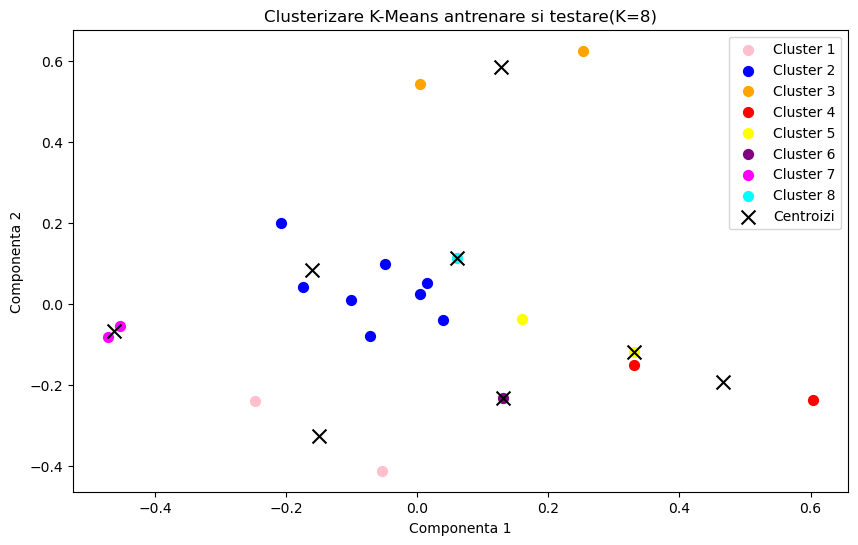

In [38]:
# Vizualizarea clusterelor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X.toarray())
X_test_pca = pca.transform(test_tfidf_matrix.toarray())

# Predictii pentru setul de antrenare si setul de testare
train_labels = cluster_assignments
test_labels = test_predictions



# Scatter plot
plt.figure(figsize=(10, 6))
colors = ['pink', 'blue', 'orange', 'red', 'yellow', 'purple', 'magenta','aqua']
for a in range(K):
    plt.scatter(X_train_pca[train_labels == a, 0], X_train_pca[train_labels == a, 1], s=50, c=colors[a], label=f'Cluster {a + 1}')
    plt.scatter(X_test_pca[test_labels == a, 0], X_test_pca[test_labels == a, 1], s=50, c=colors[a])


cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='k', marker='x', label='Centroizi')

plt.title(f'Clusterizare K-Means antrenare si testare(K={K})')
plt.xlabel('Componenta 1')
plt.ylabel('Componenta 2')
plt.legend()
plt.show()